c:\Users\Sahil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.7153 - loss: 0.7889 - val_accuracy: 0.8678 - val_loss: 0.3658
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.8617 - loss: 0.3798 - val_accuracy: 0.8836 - val_loss: 0.3175
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 27s 35ms/step - accuracy: 0.8822 - loss: 0.3237 - val_accuracy: 0.8864 - val_loss: 0.3011
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 33s 44ms/step - accuracy: 0.8967 - loss: 0.2801 - val_accuracy: 0.9020 - val_loss: 0.2685
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9028 - loss: 0.2614 - val_accuracy: 0.9060 - val_loss: 0.2562
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.9117 - loss: 0.2388 - val_accuracy: 0.9072 - val_loss: 0.2494
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 36ms/step - accuracy: 0.9195 - loss: 0.2176 - val_accuracy: 0.9110 - val_loss: 0.2450
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 26s 34ms/step - accuracy: 0.9251 - loss: 0.2020 - 

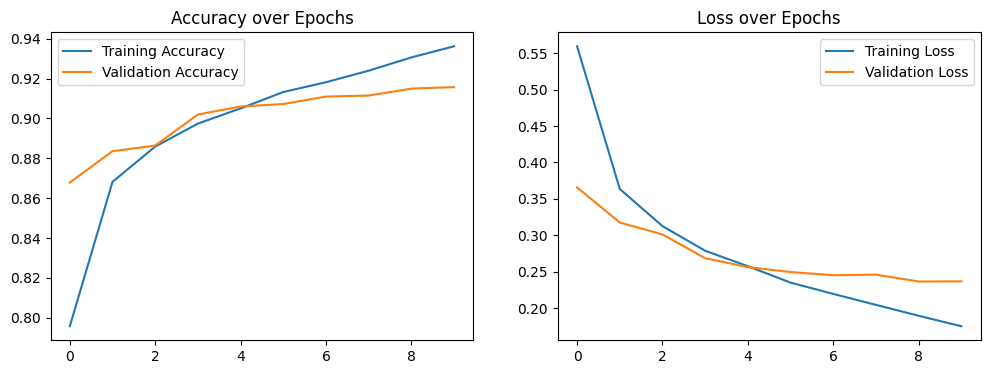

313/313 - 2s - 7ms/step - accuracy: 0.9124 - loss: 0.2480

Test Accuracy: 0.9124000072479248
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.83      0.86      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.89      0.87      1000
       Dress       0.93      0.89      0.91      1000
        Coat       0.84      0.89      0.86      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.74      0.76      0.75      1000
     Sneaker       0.97      0.95      0.96      1000
         Bag       0.99      0.97      0.98      1000
  Ankle boot       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



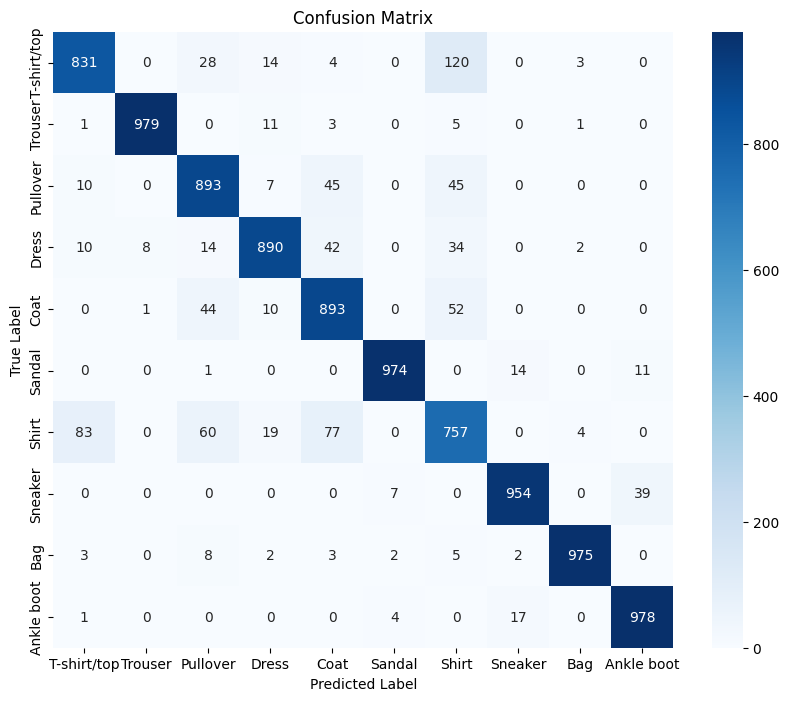

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize images (scale pixel values to [0,1])
train_images = train_images / 255.0
test_images = test_images / 255.0

# Class names for reference
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Define a custom CNN model
def create_model():
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Conv2D(64, (3,3), activation='relu'),
        keras.layers.MaxPooling2D(2,2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(10, activation='softmax')
    ])
    return model

# Reshape data for CNN
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

# Compile the model
model = create_model()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model with validation split
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=64)

# Plot accuracy and loss
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nTest Accuracy:", test_acc)

# Make predictions
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Generate classification report
print("Classification Report:")
print(classification_report(test_labels, predicted_labels, target_names=class_names))

# Confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.summary(
    line_length=None,
    positions=None,
    print_fn=None,
    expand_nested=False,
    show_trainable=False,
    layer_range=None,
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [ ]:
# Function to save model summary as an image
def save_model_summary(model, filename="week3_model_summary.png"):
    from io import StringIO
    
    # Capture model summary as string
    stream = StringIO()
    model.summary(print_fn=lambda x: stream.write(x + "\n"))
    summary_str = stream.getvalue()
    stream.close()

    # Plot summary text as an image
    plt.figure(figsize=(10, 5))
    plt.text(0, 1, summary_str, fontsize=10, family="monospace", verticalalignment='top', wrap=True)
    plt.axis("off")

    # Save image
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close()
    return filename

# Function to evaluate model accuracy
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

# Generate dummy test data (assuming original test data isn't available)
X_test = np.random.rand(100, 28, 28, 1)  # Example shape for image data
y_test = np.random.randint(0, 10, 100)   # Example labels for 10 classes

# Convert labels to categorical if needed
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Save summary image
summary_image_path = save_model_summary(model)

# Evaluate model accuracy
model_accuracy = evaluate_model(model, test_images, test_labels)

summary_image_path

'week3_model_summary.png'

In [ ]:
# Evaluate accuracy
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    return accuracy

model_accuracy = evaluate_model(model, test_images, test_labels)

print(f"Model's Test Accuracy: {model_accuracy:.2%}")

Model's Test Accuracy: 91.24%
